In [11]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem.Draw import MolsToGridImage

## Propose ortho designs from Warren's original ones for x310A and x0732A

In [30]:
df = pd.read_pickle('../base_compounds/syndirella_input_MASTER.pkl')
df

,smiles,reactants,reaction_names,num_steps,hits,compound_set
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,"[(Cn1ncc(NC(=O)OC(C)(C)C)c1N, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-1-1
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,"[(CC(C)(C)OC(=O)Nc1cccc(N)c1, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-1
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,"[(CC(C)(C)OC(=O)Nc1cc(N)c(C)cc1, O=C(O)C1CCCO1...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-2
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,"[(Nc1cc(NC(=O)OC(C)(C)C)ccn1, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-3
4,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1cc(N)ccc1C, O=C(O)C1CCCO1),...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-4
...,...,...,...,...,...,...
128,CN(C)C(=O)COc1ccc(F)c(NC(=O)C2CCCO2)c1,"[(Fc1ccc(O)cc1N, O=C(O)C1CCCO1), (O=C(Nc1cc(O)...","[Amidation, Williamson_ether_synthesis]",2,"[x0922, x0416]",x0922-x0416-merge-1-7
129,Cc1ccc(NC(=O)C2CCCO2)cc1OCC(=O)N(C)C,"[(Nc1cc(O)c(C)cc1, O=C(O)C1CCCO1), (Cc1ccc(NC(...","[Amidation, Williamson_ether_synthesis]",2,"[x0922, x0416]",x0922-x0416-merge-1-8
130,Cc1cc(C)c(OCC(=O)N(C)C)cc1NC(=O)C1CCCO1,"[(Nc1cc(O)c(C)cc1C, O=C(O)C1CCCO1), (Cc1cc(C)c...","[Amidation, Williamson_ether_synthesis]",2,"[x0922, x0416]",x0922-x0416-merge-1-9
131,CN(C)C(=O)COc1cncc(NC(=O)C2CCCO2)c1,"[(Nc1cncc(O)c1, O=C(O)C1CCCO1), (O=C(Nc1cncc(O...","[Amidation, Williamson_ether_synthesis]",2,"[x0922, x0416]",x0922-x0416-merge-1-10


In [13]:
df = df[df['hits'].apply(lambda x: x == ['x0310', 'x0732'])]
df

,smiles,reactants,reaction_names,num_steps,hits,compound_set
9,Cn1ncc(NC(=O)CC#N)c1NC(=O)CO,"[(Cn1ncc(NC(=O)OC(C)(C)C)c1N, O=C(O)CO), Cn1nc...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-1-1
10,N#CCC(=O)Nc1cccc(NC(=O)CO)c1,"[(CC(C)(C)OC(=O)Nc1cccc(N)c1, O=C(O)CO), CC(C)...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-1
11,Cc1ccc(NC(=O)CC#N)cc1NC(=O)CO,"[(CC(C)(C)OC(=O)Nc1cc(N)c(C)cc1, O=C(O)CO), Cc...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-2
12,N#CCC(=O)Nc1ccnc(NC(=O)CO)c1,"[(Nc1cc(NC(=O)OC(C)(C)C)ccn1, O=C(O)CO), CC(C)...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-3
13,Cc1ccc(NC(=O)CO)cc1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1cc(N)ccc1C, O=C(O)CO), Cc1c...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-4
14,Cc1ccc(NC(=O)CO)cc1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1cc(N)ccc1C, O=C(O)CO), Cc1c...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-5
15,N#CCC(=O)Nc1cc(NC(=O)CO)ccc1F,"[(CC(C)(C)OC(=O)Nc1cc(N)ccc1F, O=C(O)CO), CC(C...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-6
16,Cc1cc(NC(=O)CO)cc(NC(=O)CC#N)c1,"[(CC(C)(C)OC(=O)Nc1cc(C)cc(N)c1, O=C(O)CO), Cc...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-7
17,Cc1cc(NC(=O)CO)cc(NC(=O)CC#N)c1,"[(CC(C)(C)OC(=O)Nc1cc(N)cc(C)c1, O=C(O)CO), Cc...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-2-8


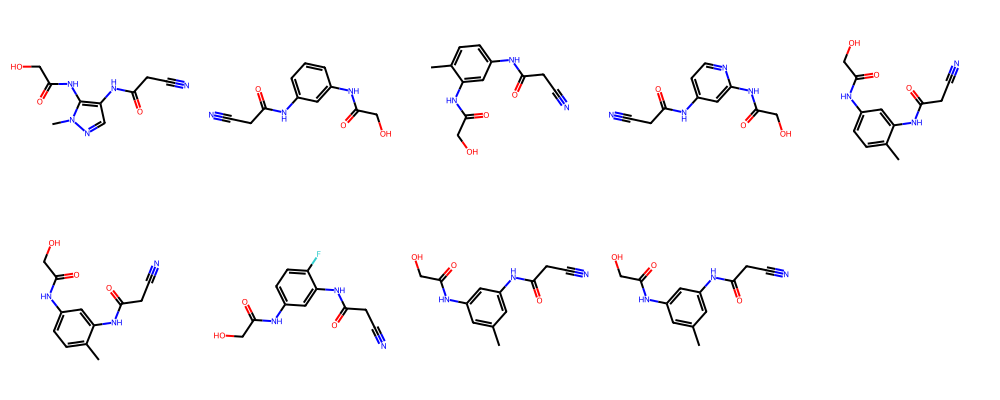

In [14]:
mols = [Chem.MolFromSmiles(x) for x in df['smiles']]
MolsToGridImage(mols, molsPerRow=5)

In [15]:
# for all rings, change amide to ortho
new_designs = {
    'x0310-x0732-merge-3-1':'N#CCC(=O)Nc1ccccc1(NC(=O)CO)',
    'x0310-x0732-merge-3-2':'Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1',
    'x0310-x0732-merge-3-3':'N#CCC(=O)Nc1ccncc1(NC(=O)CO)',
    'x0310-x0732-merge-3-4':'Cc1cccc(NC(=O)CO)c1NC(=O)CC#N',
    'x0310-x0732-merge-3-5':'N#CCC(=O)Nc1c(NC(=O)CO)cccc1F',
    'x0310-x0732-merge-3-6':'c1cc(NC(=O)CO)c(NC(=O)CC#N)cc1F',
    'x0310-x0732-merge-3-7':'Cc1ccc(NC(=O)CO)c(NC(=O)CC#N)c1',
}

In [21]:
# add reactants list
three_one = {
    'smiles': 'N#CCC(=O)Nc1ccccc1(NC(=O)CO)',
    'reactants': [('CC(C)(C)OC(=O)Nc1ccccc1(N)', 'O=C(O)CO'), 'CC(C)(C)OC(=O)Nc1ccccc1(NC(=O)CO)', ('c1cccc(NC(=O)CO)c1(N)', 'N#CCC(=O)O')],
    'reaction_names': ['Amidation', 'N-Boc_deprotection', 'Amidation'],
    'num_steps': 3,
    'hits': ['x0310', 'x0732'],
    'compound_set': 'x0310-x0732-merge-3-1' 
}

In [22]:
three_two = {
    'smiles': 'Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1',
    'reactants': [('CC(C)(C)OC(=O)Nc1ccc(C)cc1(N)', 'O=C(O)CO'), 'CC(C)(C)OC(=O)Nc1ccc(C)cc1(NC(=O)CO)', ('c1cc(C)cc(NC(=O)CO)c1(N)', 'N#CCC(=O)O')],
    'reaction_names': ['Amidation', 'N-Boc_deprotection', 'Amidation'],
    'num_steps': 3,
    'hits': ['x0310', 'x0732'],
    'compound_set': 'x0310-x0732-merge-3-2' 
}

In [23]:
three_three = {
    'smiles': 'N#CCC(=O)Nc1ccncc1(NC(=O)CO)',
    'reactants': [('CC(C)(C)OC(=O)Nc1ccncc1(N)', 'O=C(O)CO'), 'CC(C)(C)OC(=O)Nc1ccncc1(NC(=O)CO)', ('c1cncc(NC(=O)CO)c1(N)', 'N#CCC(=O)O')],
    'reaction_names': ['Amidation', 'N-Boc_deprotection', 'Amidation'],
    'num_steps': 3,
    'hits': ['x0310', 'x0732'],
    'compound_set': 'x0310-x0732-merge-3-3' 
}

In [24]:
three_four = {
    'smiles': 'Cc1cccc(NC(=O)CO)c1NC(=O)CC#N',
    'reactants': [('CC(C)(C)OC(=O)Nc1c(C)cccc1(N)', 'O=C(O)CO'), 'CC(C)(C)OC(=O)Nc1c(C)cccc1(NC(=O)CO)', ('c1(C)cccc(NC(=O)CO)c1(N)', 'N#CCC(=O)O')],
    'reaction_names': ['Amidation', 'N-Boc_deprotection', 'Amidation'],
    'num_steps': 3,
    'hits': ['x0310', 'x0732'],
    'compound_set': 'x0310-x0732-merge-3-4' 
}

In [25]:
three_five = {
    'smiles': 'N#CCC(=O)Nc1c(NC(=O)CO)cccc1F',
    'reactants': [('CC(C)(C)OC(=O)Nc1c(F)cccc1(N)', 'O=C(O)CO'), 'CC(C)(C)OC(=O)Nc1c(F)cccc1(NC(=O)CO)', ('c1(F)cccc(NC(=O)CO)c1(N)', 'N#CCC(=O)O')],
    'reaction_names': ['Amidation', 'N-Boc_deprotection', 'Amidation'],
    'num_steps': 3,
    'hits': ['x0310', 'x0732'],
    'compound_set': 'x0310-x0732-merge-3-5' 
}

In [26]:
three_six = {
    'smiles': 'c1cc(NC(=O)CO)c(NC(=O)CC#N)cc1F',
    'reactants': [('CC(C)(C)OC(=O)Nc1cc(F)ccc1(N)', 'O=C(O)CO'), 'CC(C)(C)OC(=O)Nc1cc(F)ccc1(NC(=O)CO)', ('c1c(F)ccc(NC(=O)CO)c1(N)', 'N#CCC(=O)O')],
    'reaction_names': ['Amidation', 'N-Boc_deprotection', 'Amidation'],
    'num_steps': 3,
    'hits': ['x0310', 'x0732'],
    'compound_set': 'x0310-x0732-merge-3-6' 
}

In [27]:
three_seven = {
    'smiles': 'c1cc(NC(=O)CO)c(NC(=O)CC#N)cc1F',
    'reactants': [('CC(C)(C)OC(=O)Nc1cc(C)ccc1(N)', 'O=C(O)CO'), 'CC(C)(C)OC(=O)Nc1cc(C)ccc1(NC(=O)CO)', ('c1c(C)ccc(NC(=O)CO)c1(N)', 'N#CCC(=O)O')],
    'reaction_names': ['Amidation', 'N-Boc_deprotection', 'Amidation'],
    'num_steps': 3,
    'hits': ['x0310', 'x0732'],
    'compound_set': 'x0310-x0732-merge-3-7' 
}

In [34]:
new_designs = [three_one, three_two, three_three, three_four, three_five, three_six, three_seven]
new_designs = pd.DataFrame(new_designs)
new_designs

,smiles,reactants,reaction_names,num_steps,hits,compound_set
0,N#CCC(=O)Nc1ccccc1(NC(=O)CO),"[(CC(C)(C)OC(=O)Nc1ccccc1(N), O=C(O)CO), CC(C)...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-1
1,Cc1cc(NC(=O)CO)c(NC(=O)CC#N)cc1,"[(CC(C)(C)OC(=O)Nc1ccc(C)cc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-2
2,N#CCC(=O)Nc1ccncc1(NC(=O)CO),"[(CC(C)(C)OC(=O)Nc1ccncc1(N), O=C(O)CO), CC(C)...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-3
3,Cc1cccc(NC(=O)CO)c1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1c(C)cccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-4
4,N#CCC(=O)Nc1c(NC(=O)CO)cccc1F,"[(CC(C)(C)OC(=O)Nc1c(F)cccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-5
5,c1cc(NC(=O)CO)c(NC(=O)CC#N)cc1F,"[(CC(C)(C)OC(=O)Nc1cc(F)ccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-6
6,c1cc(NC(=O)CO)c(NC(=O)CC#N)cc1F,"[(CC(C)(C)OC(=O)Nc1cc(C)ccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-7


In [35]:
df = pd.read_pickle('../base_compounds/syndirella_input_MASTER.pkl')
df = pd.concat([df, new_designs], ignore_index=True)
df.reset_index(drop=True, inplace=True)
df.to_pickle('../base_compounds/syndirella_input_MASTER.pkl')

,smiles,reactants,reaction_names,num_steps,hits,compound_set
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,"[(Cn1ncc(NC(=O)OC(C)(C)C)c1N, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-1-1
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,"[(CC(C)(C)OC(=O)Nc1cccc(N)c1, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-1
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,"[(CC(C)(C)OC(=O)Nc1cc(N)c(C)cc1, O=C(O)C1CCCO1...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-2
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,"[(Nc1cc(NC(=O)OC(C)(C)C)ccn1, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-3
4,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1cc(N)ccc1C, O=C(O)C1CCCO1),...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0416]",x0310-x0416-merge-2-4
...,...,...,...,...,...,...
135,N#CCC(=O)Nc1ccncc1(NC(=O)CO),"[(CC(C)(C)OC(=O)Nc1ccncc1(N), O=C(O)CO), CC(C)...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-3
136,Cc1cccc(NC(=O)CO)c1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1c(C)cccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-4
137,N#CCC(=O)Nc1c(NC(=O)CO)cccc1F,"[(CC(C)(C)OC(=O)Nc1c(F)cccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-5
138,c1cc(NC(=O)CO)c(NC(=O)CC#N)cc1F,"[(CC(C)(C)OC(=O)Nc1cc(F)ccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310, x0732]",x0310-x0732-merge-3-6


In [37]:
# add As to fragment names
df['hits'] = df['hits'].apply(lambda x: [f'{y}A' for y in x])
df

,smiles,reactants,reaction_names,num_steps,hits,compound_set
0,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,"[(Cn1ncc(NC(=O)OC(C)(C)C)c1N, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0416A]",x0310-x0416-merge-1-1
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,"[(CC(C)(C)OC(=O)Nc1cccc(N)c1, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0416A]",x0310-x0416-merge-2-1
2,Cc1ccc(NC(=O)CC#N)cc1NC(=O)C1CCCO1,"[(CC(C)(C)OC(=O)Nc1cc(N)c(C)cc1, O=C(O)C1CCCO1...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0416A]",x0310-x0416-merge-2-2
3,N#CCC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,"[(Nc1cc(NC(=O)OC(C)(C)C)ccn1, O=C(O)C1CCCO1), ...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0416A]",x0310-x0416-merge-2-3
4,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1cc(N)ccc1C, O=C(O)C1CCCO1),...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0416A]",x0310-x0416-merge-2-4
...,...,...,...,...,...,...
135,N#CCC(=O)Nc1ccncc1(NC(=O)CO),"[(CC(C)(C)OC(=O)Nc1ccncc1(N), O=C(O)CO), CC(C)...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0732A]",x0310-x0732-merge-3-3
136,Cc1cccc(NC(=O)CO)c1NC(=O)CC#N,"[(CC(C)(C)OC(=O)Nc1c(C)cccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0732A]",x0310-x0732-merge-3-4
137,N#CCC(=O)Nc1c(NC(=O)CO)cccc1F,"[(CC(C)(C)OC(=O)Nc1c(F)cccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0732A]",x0310-x0732-merge-3-5
138,c1cc(NC(=O)CO)c(NC(=O)CC#N)cc1F,"[(CC(C)(C)OC(=O)Nc1cc(F)ccc1(N), O=C(O)CO), CC...","[Amidation, N-Boc_deprotection, Amidation]",3,"[x0310A, x0732A]",x0310-x0732-merge-3-6


In [38]:
df.to_pickle('../base_compounds/syndirella_input_MASTER_v2.pkl')
df.to_csv('../base_compounds/syndirella_input_MASTER_v2.csv', index=False)